In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from keras.datasets import cifar10
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape, y_train.shape, y_test.shape,x_test.shape


((50000, 32, 32, 3), (50000, 1), (10000, 1), (10000, 32, 32, 3))

# visualization

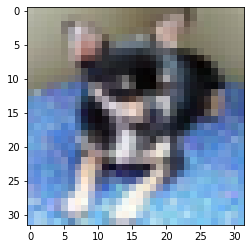

In [4]:
i = 3005
plt.imshow(x_train[i])

# plot meny image at a time like grid or matrix

C:\Users\pranj\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


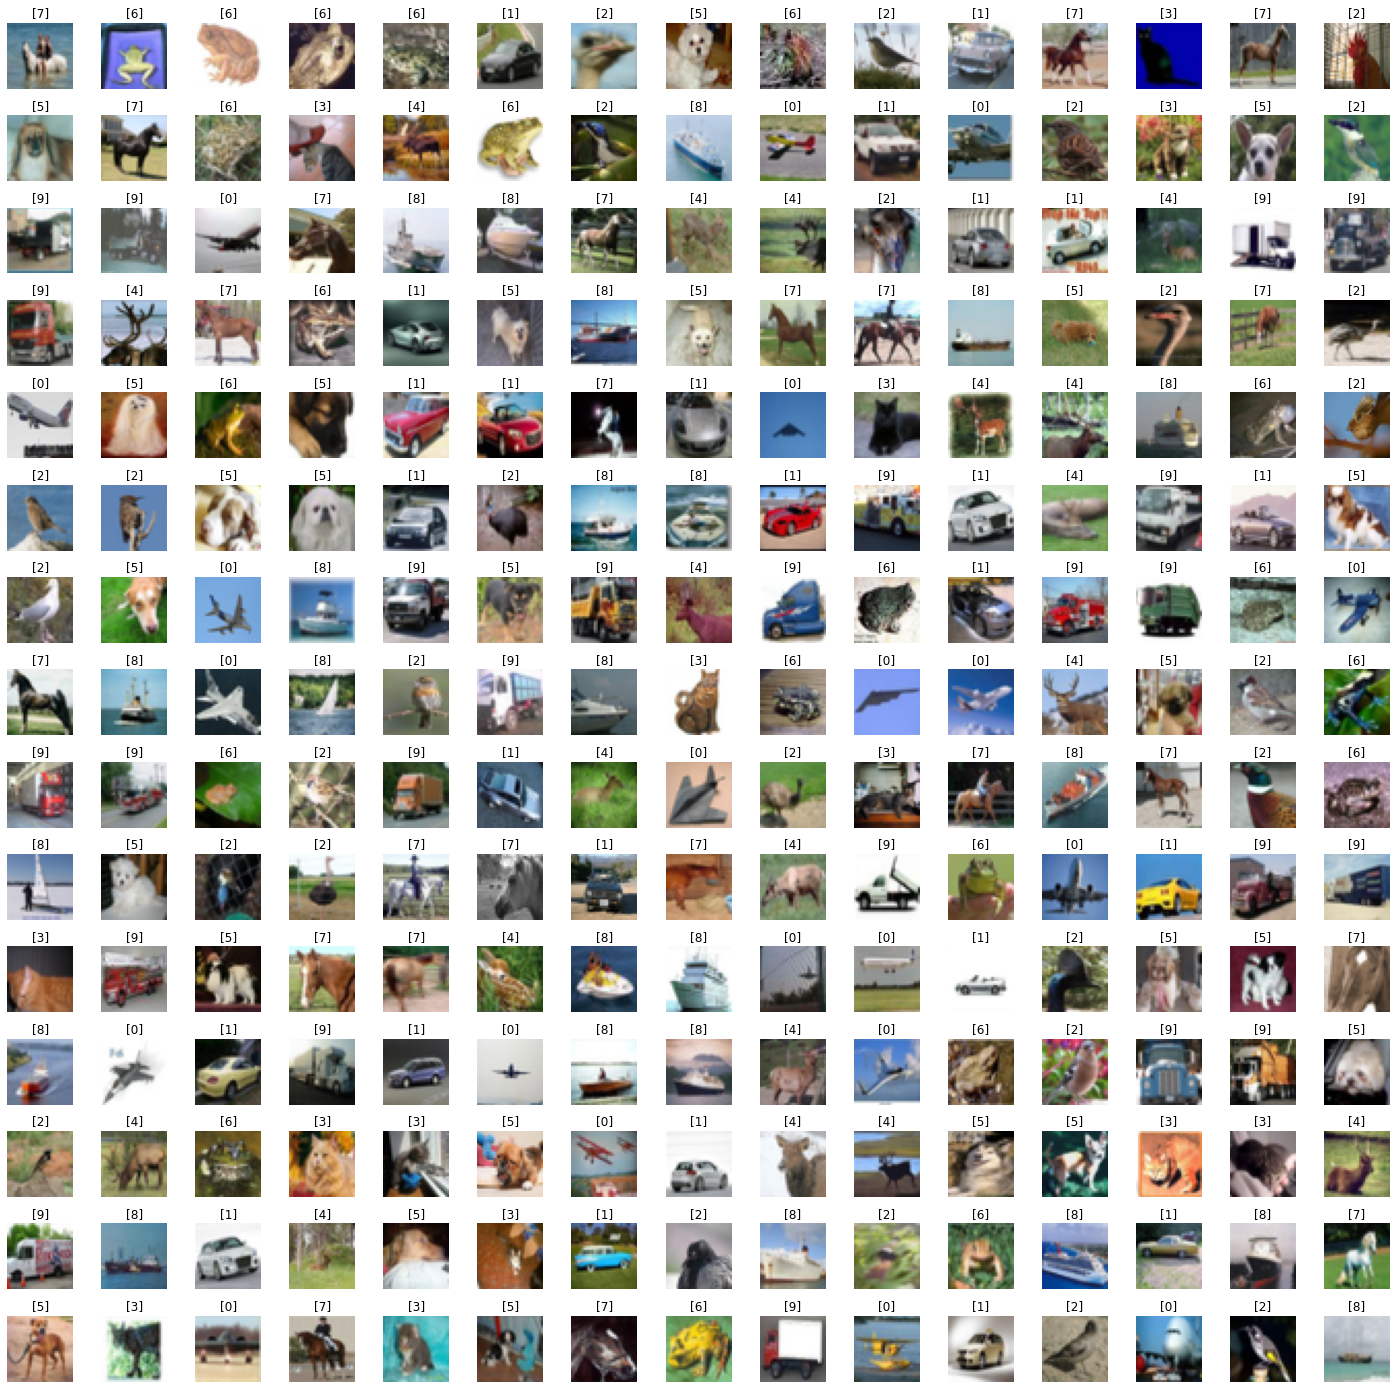

In [5]:
Width_grid = 15
Length_grid = 15

fig, axes = plt.subplots(Length_grid, Width_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(x_train) #simply int numbers witch is 50000

for i in np.arange(0, Length_grid*Width_grid):
    index = np.random.randint(0, n_training) #simply pick a random int valve
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
    plt.subplots_adjust(hspace = 0.4) #space btw images by sifting the axis

In [6]:
# .ravel() is used for flatnning the matrix into 225 arrary(which is simply 15*15 )

# data prepration

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
number_cat = 10

In [8]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [9]:
import tensorflow as tf
from keras import utils

y_train =  tf.keras.utils.to_categorical(y_train, number_cat)
y_test = tf.keras.utils.to_categorical(y_test,number_cat)

In [10]:
y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [13]:
x_train.shape


(50000, 32, 32, 3)

In [14]:
Input_shape = x_train.shape[1:] # we are dropping 50000 value and only take (32,32,3)

In [15]:
Input_shape


(32, 32, 3)

# train our model

In [16]:
import tensorflow
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.callbacks import TensorBoard

In [17]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
#uppar two line is normally two convolutional layer of first layer
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

# this is for 2nd layer of convolutional layer
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten()) #flattening the pooling feature
# 1st layer of artificial neural network(no of neuron is 1024)
cnn_model.add(Dense(units = 1024, activation = 'relu'))
# 2nd
cnn_model.add(Dense(units = 1024, activation = 'relu'))
#output layer
cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [18]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer =tensorflow.keras.optimizers.RMSprop(learning_rate = 0.001), metrics = ['accuracy'])

In [19]:
history = cnn_model.fit(x_train, y_train, batch_size = 100, epochs = 2, shuffle = True)

Epoch 1/2
500/500 [==============================] - 236s 465ms/step - loss: 1.7692 - accuracy: 0.3573
Epoch 2/2
500/500 [==============================] - 232s 463ms/step - loss: 1.2494 - accuracy: 0.5563


# Evaluate the model

In [20]:
evaluation = cnn_model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 11s 33ms/step - loss: 1.0506 - accuracy: 0.6295
Test Accuracy: 0.6294999718666077


In [21]:
predicted_classes = np.argmax(cnn_model.predict(x_test), axis=-1)
predicted_classes

array([3, 1, 1, ..., 5, 4, 7], dtype=int64)

In [22]:
y_test = y_test.argmax(1)

In [23]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

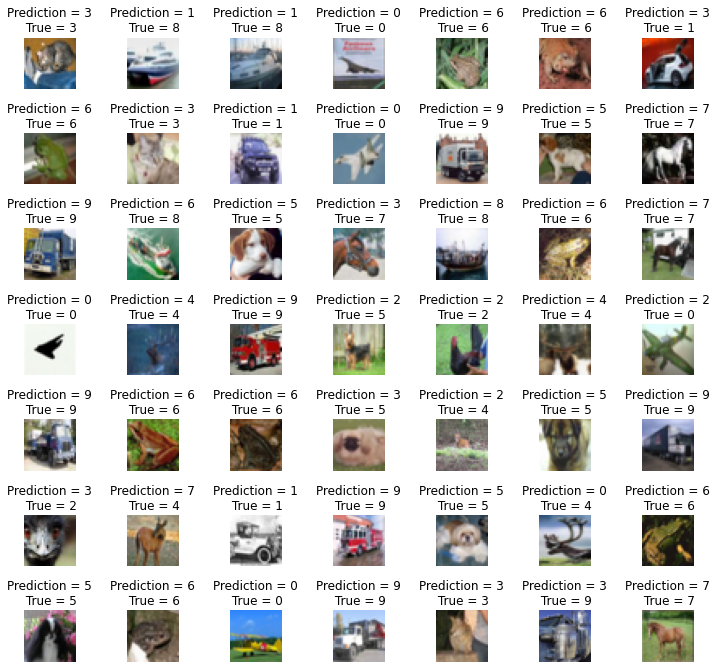

In [24]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

<AxesSubplot:>

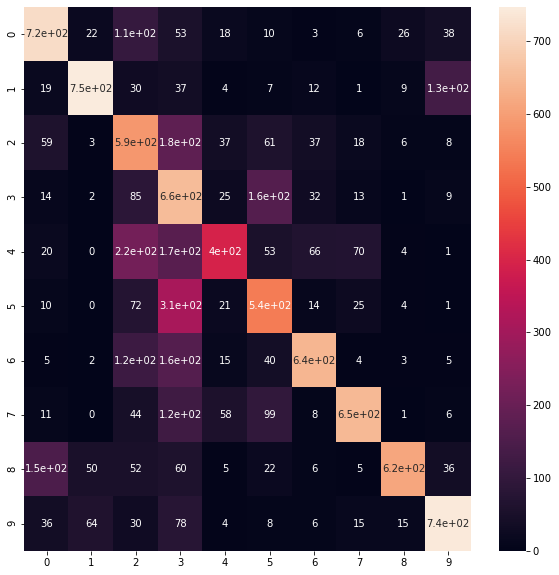

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# save model

In [26]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# IMPROVING THE MODEL-DATA AUGMENTATION

In [27]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [28]:
datagen.fit(x_train)

In [29]:
cnn_model.fit_generator(datagen.flow(x_train, y_train, batch_size = 32), epochs = 3)


C:\Users\pranj\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
1563/1563 [==============================] - 1256s 803ms/step - loss: 1.7438 - accuracy: 0.3766
Epoch 2/3
1563/1563 [==============================] - 323s 207ms/step - loss: 1.6167 - accuracy: 0.4259
Epoch 3/3
1563/1563 [==============================] - 326s 208ms/step - loss: 1.5676 - accuracy: 0.4450


In [33]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)